# Building Attention detector in Students during Online Class

### using OpenCV with Mediapipe

In [1]:
!pip install numpy --quiet
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install opencv-python --quiet


In [2]:
!pip install --upgrade pip --quiet
!pip install mediapipe --quiet

ERROR: To modify pip, please run the following command:
C:\Users\hltej\miniconda3\envs\torch_nn\python.exe -m pip install --upgrade pip --quiet


In [3]:
import numpy as np
import pandas as pd
import os 

import mediapipe as mp
import cv2
import time
from PIL import Image 

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import Video

## Face Mesh

In [ ]:
path = "D:\\tejasurya-github-io\\Attention-detector\\Attention-detector-in-Students\\images\\test_imgs\\face_test.png"

img = cv2.imread(path)

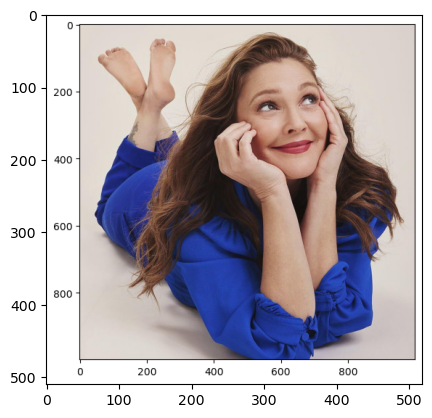

In [5]:

plt.imshow(img[:,:,[2,1,0]])
plt.show()

In [6]:
mpFaceMesh = mp.solutions.face_mesh
mpDraw = mp.solutions.drawing_utils
faceMesh = mpFaceMesh.FaceMesh()
drawSpec = mpDraw.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1)

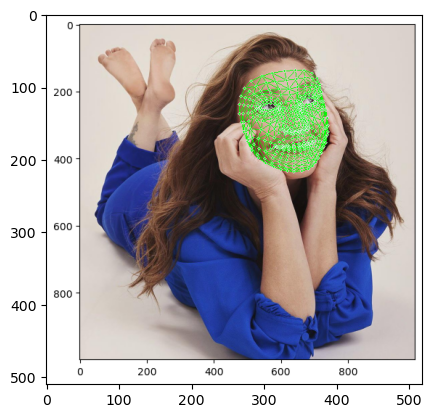

In [7]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = faceMesh.process(imgRGB)

if results.multi_face_landmarks:
    for faceLms in results.multi_face_landmarks:
        mpDraw.draw_landmarks(img, faceLms, mpFaceMesh.FACEMESH_TESSELATION, drawSpec, drawSpec)
    # print(detection.location_data.relative_bounding_box)
         
# Image.fromarray(img[:,:,[2,1,0]])
plt.imshow(img[:,:,[2,1,0]])
plt.show()

In [8]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [9]:
# For static images:
IMAGE_FILES = []
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

## For Webcam input and the iris detection output

In [ ]:
# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        '''mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())'''
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
cap.release()

Attention detector in Students during Online Class.
Three parameters are tested. Warnings are displayed in such cases.
1. If the Student is present in the Camera frame.
2. If the eyes of the student is closed beyond the threshold (in time) value.
3. If the Student is moving his face in either sides during the class time.

the MediaPipe face mesh and add some other functionality to detect:

   <p> Eye state (open/closed) - Using the Eye Aspect Ratio (EAR) calculation, which measures the ratio between the vertical and horizontal distances of eye landmarks
    Face orientation - By comparing the distances between the nose tip and cheeks to determine if the person is facing forward, left, or right
    Attention status - Combining eye state and face orientation to determine if the person is attentive or not
    </p>


The detection status is displayed in the top-left corner of the video with three labels:
- Attention: Attentive/Unattentive
- Eyes: Open/Closed
- Face: Facing Forward/Left/Right
    
Key components added to the original code:
<p>Specific facial landmark indices for eyes and face orientation detection
Functions to calculate EAR (Eye Aspect Ratio)
Logic to determine face orientation based on relative positions of nose and cheeks
Status determination based on multiple factors
Status display with black background for better visibility</p>

You may need to adjust the EAR threshold based on your specific camera setup and lighting conditions. The current threshold is set to 0.2, but you might need to experiment with different values for optimal detection.

Would you like me to explain any specific part of this implementation in more detail?


In [110]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [111]:
# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)

In [112]:
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))


In [113]:
# Define face mesh indices
# Eye landmarks (simplified)
LEFT_EYE_INDICES = [362, 385, 387, 263, 373, 380]  # Left eye landmarks
RIGHT_EYE_INDICES = [33, 160, 158, 133, 153, 144]  # Right eye landmarks

In [114]:
# Face orientation landmarks
NOSE_TIP = 4  # Nose tip index
LEFT_CHEEK = 234  # Left cheek
RIGHT_CHEEK = 454  # Right cheek

In [115]:
# Timer variables
unattentive_start_time = None
eyes_closed_start_time = None
UNATTENTIVE_THRESHOLD = 5.0  # seconds

In [116]:
# Function to calculate eye aspect ratio (EAR)
def calculate_ear(landmarks, eye_indices):
    points = []
    for index in eye_indices:
        point = landmarks.landmark[index]
        points.append([point.x, point.y])
    
    # Calculate the EAR
    # EAR = (||p2-p6|| + ||p3-p5||) / (2||p1-p4||)
    # Simplified for the available points
    vertical_dist1 = np.sqrt((points[1][0] - points[5][0])**2 + (points[1][1] - points[5][1])**2)
    vertical_dist2 = np.sqrt((points[2][0] - points[4][0])**2 + (points[2][1] - points[4][1])**2)
    horizontal_dist = np.sqrt((points[0][0] - points[3][0])**2 + (points[0][1] - points[3][1])**2)
    
    if horizontal_dist == 0:
        return 0
    
    ear = (vertical_dist1 + vertical_dist2) / (2.0 * horizontal_dist)
    return ear

In [117]:
# Function to detect face orientation
def detect_face_orientation(landmarks):
    nose_tip = landmarks.landmark[NOSE_TIP]
    left_cheek = landmarks.landmark[LEFT_CHEEK]
    right_cheek = landmarks.landmark[RIGHT_CHEEK]
    
    # Calculate face orientation based on relative positions
    # If face is centered, the distance from nose to each cheek should be similar
    dist_left = np.sqrt((nose_tip.x - left_cheek.x)**2 + (nose_tip.y - left_cheek.y)**2)
    dist_right = np.sqrt((nose_tip.x - right_cheek.x)**2 + (nose_tip.y - right_cheek.y)**2)
    
    # Calculate ratio of distances
    ratio = dist_left / dist_right if dist_right != 0 else float('inf')
    
    if 0.8 <= ratio <= 1.2:
        return "Facing Forward"
    elif ratio < 0.8:
        return "Facing Right"
    else:
        return "Facing Left"

In [118]:
# Function to determine attention state
def determine_attention(ear_left, ear_right, face_orientation):
    # Define thresholds
    EAR_THRESHOLD = 0.2  # Threshold for open/closed eyes
    
    # Check if the eyes are closed
    if ear_left < EAR_THRESHOLD and ear_right < EAR_THRESHOLD:
        eye_status = "Eyes Closed"
    else:
        eye_status = "Eyes Open"
    
    # Determine attention state based on eye status and face orientation
    if eye_status == "Eyes Closed":
        return "Unattentive", eye_status
    elif face_orientation != "Facing Forward":
        return "Unattentive", eye_status
    else:
        return "Attentive", eye_status


### Warnings are displayed for the following conditions
1. If the Student is present in the Camera frame.
2. If the eyes of the student is closed beyond the threshold (in time) value.
3. If the Student is moving his face in either sides during the class time.


In [119]:
def display_warning(cv2,warning_message,font,display_image):
    # Display warning at center with red background
    text_size = cv2.getTextSize(warning_message, font, 1.0, 3)[0]
    text_x = (display_image.shape[1] - text_size[0]) // 2
    text_y = (display_image.shape[0] + text_size[1]) // 2
            
    # Background for warning
    cv2.rectangle(display_image, 
            (text_x - 10, text_y - text_size[1] - 10),
            (text_x + text_size[0] + 10, text_y + 10),
            (0, 0, 255), -1)
            
    # Warning text
    cv2.putText(display_image, warning_message, (text_x, text_y), 
                       font, 1.0, (255, 255, 255), 3)

In [ ]:
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    
    # Previous status tracking
    prev_attention_status = None
    prev_eye_status = None
    
    # Now flip the image for display

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            warning_message="Warning:\nIssue with the Camera"
            show_warning=True
            continue
            

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)
        
        # Draw the face mesh annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Initialize status variables
        attention_status = "No Face Detected"
        eye_status = "Unknown"
        face_orientation = "Unknown"
        
        # First process face mesh on the original image
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # Calculate EAR for both eyes
                left_ear = calculate_ear(face_landmarks, LEFT_EYE_INDICES)
                right_ear = calculate_ear(face_landmarks, RIGHT_EYE_INDICES)
                
                # Detect face orientation
                face_orientation = detect_face_orientation(face_landmarks)
                
                # Determine attention status
                attention_status, eye_status = determine_attention(left_ear, right_ear, face_orientation)
                
                # Draw face mesh on the original image
                '''
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_tesselation_style())
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_contours_style())
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_IRISES,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_iris_connections_style())
                '''
        
        # Handle timers based on state transitions
        current_time = time.time()

               # Handle attention status timer
        if attention_status == "Unattentive":
            if prev_attention_status == "Attentive" or prev_attention_status is None:
                # Just became unattentive
                unattentive_start_time = current_time
            # Calculate duration
            if unattentive_start_time is not None:
                unattentive_duration = current_time - unattentive_start_time
            else:
                unattentive_duration = 0
        else:
            unattentive_start_time = None
            unattentive_duration = 0

      # Handle eye status timer
        if eye_status == "Eyes Closed":
            if prev_eye_status == "Eyes Open" or prev_eye_status is None:
                # Just closed eyes
                eyes_closed_start_time = current_time
            # Calculate duration
            if eyes_closed_start_time is not None:
                eyes_closed_duration = current_time - eyes_closed_start_time
            else:
                eyes_closed_duration = 0
        else:
            eyes_closed_start_time = None
            eyes_closed_duration = 0
        
        # Update previous status
        prev_attention_status = attention_status
        prev_eye_status = eye_status
        
        # Now flip the image for display
        display_image = cv2.flip(image.copy(), 1)

        # Display status information on the flipped image
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        font_color = (255, 255, 255)  # White text
        
        # Add background rectangle for better text visibility
        cv2.rectangle(display_image, (10, 10), (300, 110), (0, 0, 0), -1)
        
        # Display status information (now on the flipped image with correct text orientation)
        cv2.putText(display_image, f"Attention: {attention_status}", (20, 40), font, font_scale, font_color, font_thickness)
        cv2.putText(display_image, f"Eyes: {eye_status}", (20, 70), font, font_scale, font_color, font_thickness)
        cv2.putText(display_image, f"Face: {face_orientation}", (20, 100), font, font_scale, font_color, font_thickness)
        
        # Display warning if thresholds exceeded
        show_warning = False
        warning_message = ""
        
        if unattentive_duration > UNATTENTIVE_THRESHOLD:
            show_warning = True
            warning_message = "WARNING: UNATTENTIVE. Please focus!"
        
        if eyes_closed_duration > UNATTENTIVE_THRESHOLD:
            show_warning = True
            warning_message = "WARNING: Don't sleep!"

        if attention_status == "No Face Detected" or eye_status=="Unknown" or face_orientation == "Unknown":
            show_warning = True
            warning_message="Warning:\nPerson not found.\nPlease sit infront of Camera."

        if show_warning:
            display_warning(cv2,warning_message,font,display_image)
        
        display_image = cv2.resize(display_image, (640, 480))
        # Saving the video
        out.write(display_image)
        # Display the image
        cv2.imshow('Face Attention span', display_image)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break
    
cap.release()
out.release()
cv2.destroyAllWindows()